In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# DenseNet121

5 CheXpert clients  
SGD, learning rate 0.01  
One-channel input  

## Binary Classification

## Local Results

In [2]:
path_to_files = 'ignore/fl_densenet_mod_3009/'
local_file='train_results.csv'
local = pd.read_csv(path_to_files + local_file, index_col=0)

In [3]:
local.sort_values(by=['round', 'client', 'epoch'], inplace=True)
local.reset_index(inplace=True, drop=True)
local.head()

,round,client,epoch,time,train loss,val loss,val AUC
0,0,0,1,284.929324,0.244510,0.220316,0.866167
1,0,1,1,265.071123,0.244676,0.228917,0.843450
2,0,2,1,276.528786,0.240364,0.252583,0.847876
3,0,3,1,266.776628,0.244392,0.245315,0.849392
4,0,4,1,252.880912,0.250648,0.229576,0.840454


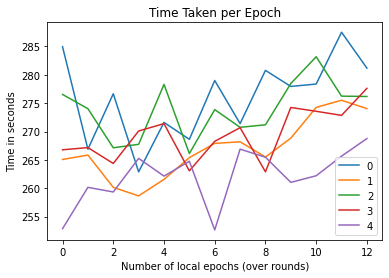

In [4]:
fig = plt.figure()

for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['time'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('Time in seconds')
plt.title('Time Taken per Epoch')

plt.show()

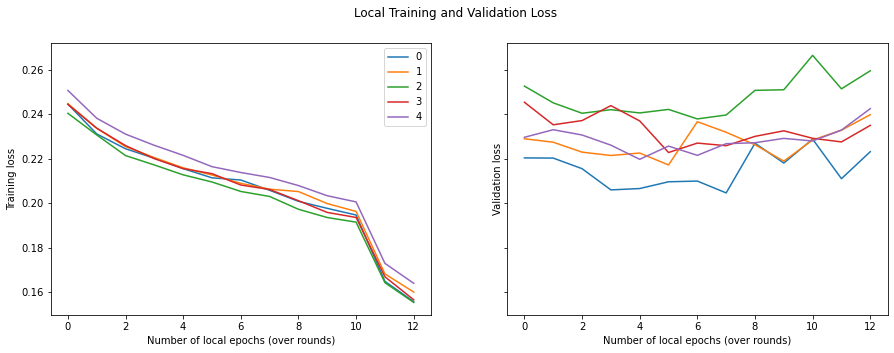

In [5]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))

for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[0].plot(client_df.index, client_df['train loss'], label=client_df['client'][0])

ax[0].legend()
ax[0].set_xlabel('Number of local epochs (over rounds)')
ax[0].set_ylabel('Training loss')


for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[1].plot(client_df.index, client_df['val loss'], label=client_df['client'][0])

ax[1].set_xlabel('Number of local epochs (over rounds)')
ax[1].set_ylabel('Validation loss')

fig.suptitle('Local Training and Validation Loss')


plt.show()

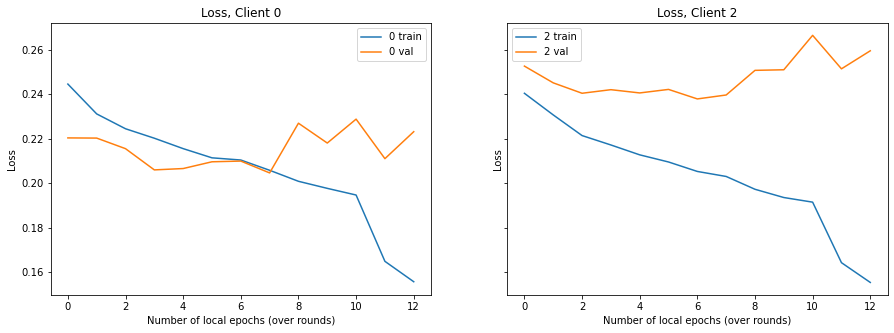

In [6]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))

for i in [0]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[0].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[0].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')


ax[0].legend()
ax[0].set_xlabel('Number of local epochs (over rounds)')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss, Client 0')

for i in [2]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[1].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[1].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')

ax[1].legend()
ax[1].set_xlabel('Number of local epochs (over rounds)')
ax[1].set_ylabel('Loss')
ax[1].set_title('Loss, Client 2')


plt.show()

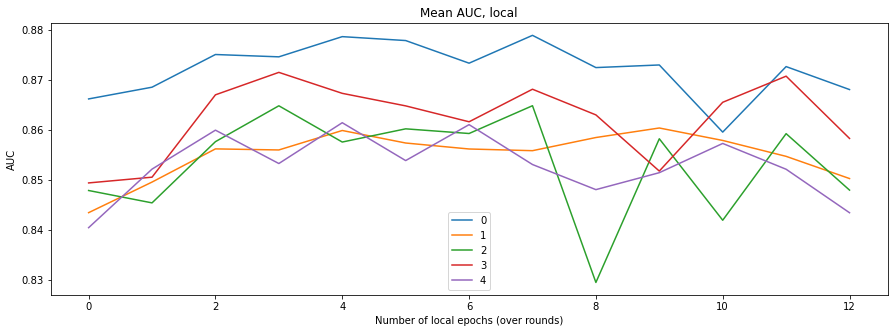

In [7]:
fig = plt.figure(figsize=(15,5))

for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['val AUC'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('AUC')
plt.title('Mean AUC, local')

plt.show()

## Global Results

In [8]:
global_df = pd.read_csv(path_to_files+'global_validation.csv', index_col=None)

In [9]:
global_df

,round,val AUC
0,0,0.852907
1,1,0.862868
2,2,0.867253
3,3,0.869614
4,4,0.871025
5,5,0.872487
6,6,0.872630
7,7,0.872702
8,8,0.871006
9,9,0.871346


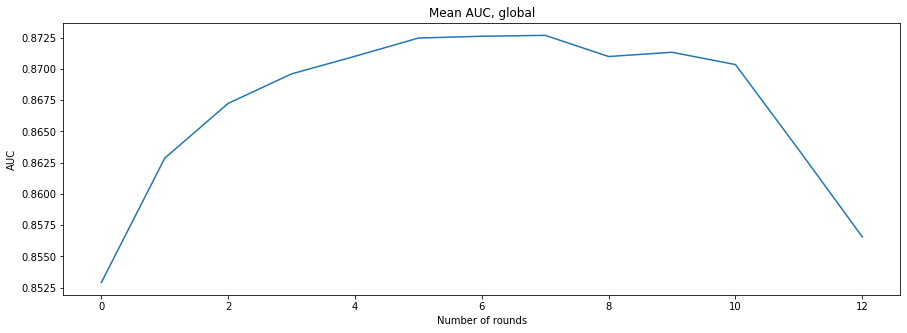

In [10]:
fig = plt.figure(figsize=(15,5))


plt.plot(global_df['round'], global_df['val AUC'])

plt.xlabel('Number of rounds')
plt.ylabel('AUC')
plt.title('Mean AUC, global')

plt.show()

### Learning Rate 0.1

In [2]:
global_df = pd.read_csv('ignore/fl_densenet_bin_lr0_1/global_validation.csv', index_col=None)

In [3]:
global_df

,round,val AUC
0,0,0.415662
1,1,0.669982
2,2,0.583504
3,3,0.621870
4,4,0.666026
5,5,0.826466
6,6,0.832019
7,7,0.836283
8,8,0.835035
9,9,0.840055


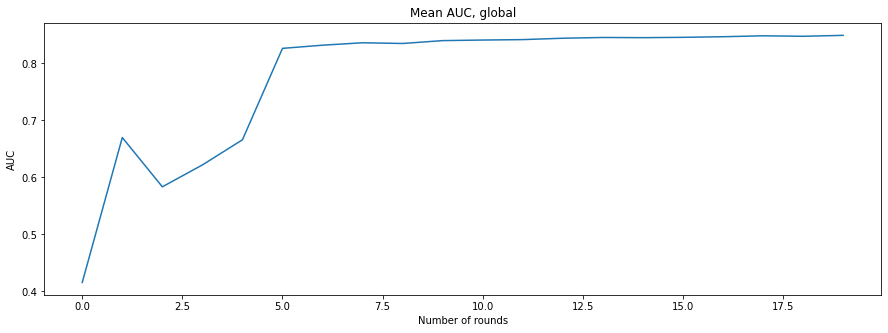

In [4]:
fig = plt.figure(figsize=(15,5))


plt.plot(global_df['round'], global_df['val AUC'])

plt.xlabel('Number of rounds')
plt.ylabel('AUC')
plt.title('Mean AUC, global')

plt.show()

# Baseline Competition Findings

Learning rate 0.1

## Local Results

In [2]:
path_to_files = 'ignore/fl_densenet_comp_lr0_1/'
local_file='train_results.csv'
local = pd.read_csv(path_to_files + local_file, index_col=0)

In [3]:
local.sort_values(by=['round', 'client', 'epoch'], inplace=True)
local.reset_index(inplace=True, drop=True)
local.head()

,round,client,epoch,time,train loss,val loss,val AUC
0,0,0,1,383.480320,0.421134,0.383137,0.754576
1,0,1,1,373.833331,0.421224,0.396047,0.758273
2,0,2,1,397.581875,0.430465,0.365136,0.762429
3,0,3,1,396.316910,0.424202,0.411921,0.758149
4,0,4,1,379.581231,0.421198,0.381903,0.760554


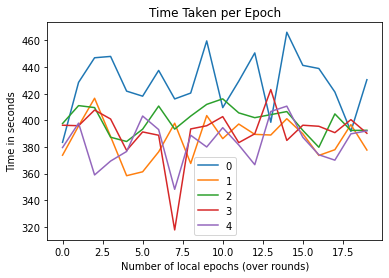

In [4]:
fig = plt.figure()

for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['time'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('Time in seconds')
plt.title('Time Taken per Epoch')

plt.show()

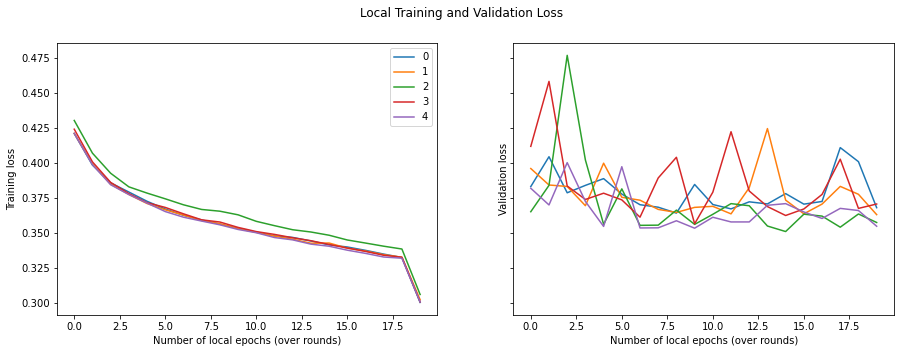

In [5]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))

for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[0].plot(client_df.index, client_df['train loss'], label=client_df['client'][0])

ax[0].legend()
ax[0].set_xlabel('Number of local epochs (over rounds)')
ax[0].set_ylabel('Training loss')


for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[1].plot(client_df.index, client_df['val loss'], label=client_df['client'][0])

ax[1].set_xlabel('Number of local epochs (over rounds)')
ax[1].set_ylabel('Validation loss')

fig.suptitle('Local Training and Validation Loss')


plt.show()

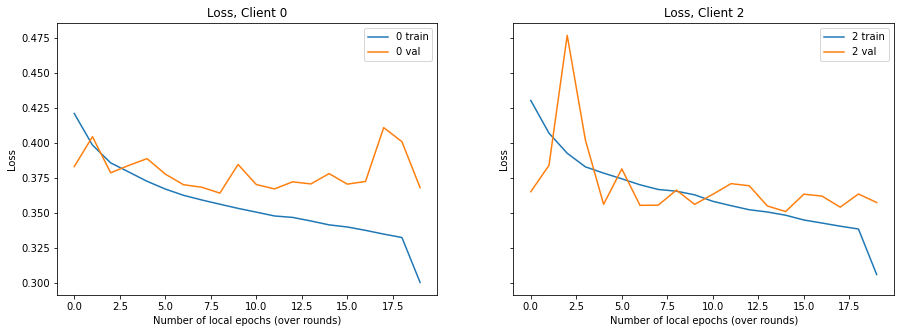

In [6]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))

for i in [0]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[0].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[0].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')


ax[0].legend()
ax[0].set_xlabel('Number of local epochs (over rounds)')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss, Client 0')

for i in [2]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[1].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[1].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')

ax[1].legend()
ax[1].set_xlabel('Number of local epochs (over rounds)')
ax[1].set_ylabel('Loss')
ax[1].set_title('Loss, Client 2')


plt.show()

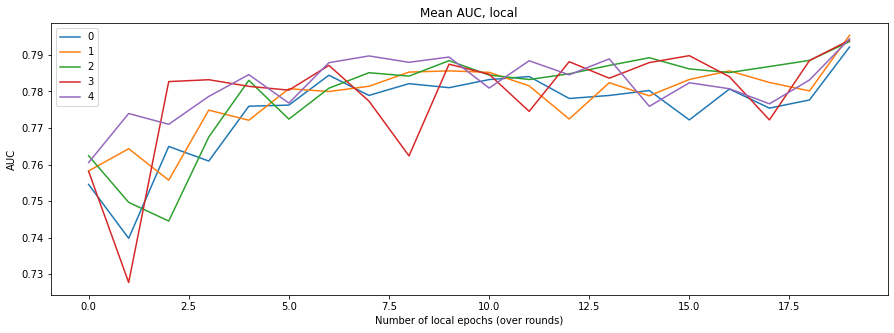

In [7]:
fig = plt.figure(figsize=(15,5))

for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['val AUC'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('AUC')
plt.title('Mean AUC, local')

plt.show()

## Global Results

In [8]:
global_df = pd.read_csv(path_to_files+'global_validation.csv', index_col=None)

In [9]:
global_df #best global model round 15

,round,val AUC
0,0,0.721595
1,1,0.780559
2,2,0.788542
3,3,0.792203
4,4,0.792301
5,5,0.795331
6,6,0.796519
7,7,0.798389
8,8,0.799247
9,9,0.799073


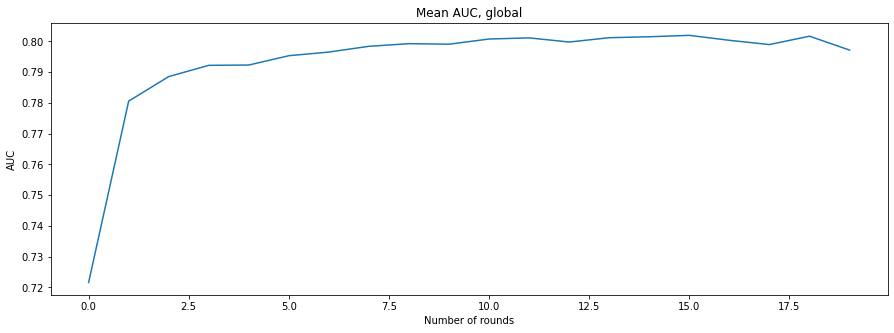

In [10]:
fig = plt.figure(figsize=(15,5))


plt.plot(global_df['round'], global_df['val AUC'])

plt.xlabel('Number of rounds')
plt.ylabel('AUC')
plt.title('Mean AUC, global')

plt.show()

Global model DenseNet lr 0.1, round 15, individual results  

client 0  
AUROC mean: 0.7971  
Cardiomegaly : 0.8774  
Edema : 0.8156  
Consolidation : 0.7437  
Atelectasis : 0.6786  
Pleural Effusion : 0.8699

client 1  
AUROC mean: 0.8016  
Cardiomegaly : 0.8764  
Edema : 0.8380  
Consolidation : 0.7144  
Atelectasis : 0.6974  
Pleural Effusion : 0.8819

client 2   
AUROC mean: 0.8057  
Cardiomegaly : 0.8835  
Edema : 0.8461  
Consolidation : 0.7250  
Atelectasis : 0.6877  
Pleural Effusion : 0.8863

client 3  
AUROC mean: 0.8045  
Cardiomegaly : 0.8823  
Edema : 0.8232  
Consolidation : 0.7368  
Atelectasis : 0.7069  
Pleural Effusion : 0.8734

client 4  
AUROC mean: 0.8008  
Cardiomegaly : 0.8745  
Edema : 0.8395  
Consolidation : 0.7249  
Atelectasis : 0.6825  
Pleural Effusion : 0.8827

AUC Mean of all clients: 0.802  
Mean for Cardiomegaly: 0.8788  
Mean for Edema: 0.8324  
Mean for Consolidation: 0.7289  
Mean for Atelectasis: 0.6906  
Mean for Pleural Effusion: 0.8788

### Learning Rate 0.01

In [11]:
global_df = pd.read_csv('ignore/fl_densenet_compfindings_0110/'+'global_validation.csv', index_col=None)

In [12]:
global_df

,round,val AUC
0,0,0.739820
1,1,0.774267
2,2,0.783668
3,3,0.786841
4,4,0.788867
5,5,0.790943
6,6,0.791632
7,7,0.792713
8,8,0.792452
9,9,0.792407


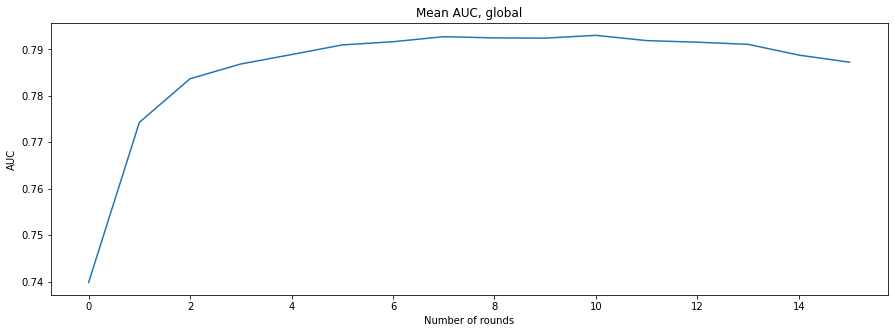

In [13]:
fig = plt.figure(figsize=(15,5))


plt.plot(global_df['round'], global_df['val AUC'])

plt.xlabel('Number of rounds')
plt.ylabel('AUC')
plt.title('Mean AUC, global')

plt.show()

### Learning Rate 0.001

In [17]:
global_df = pd.read_csv('ignore/fl_densenet_comp_lr0_001/'+'global_validation.csv', index_col=None)

In [18]:
global_df

,round,val AUC
0,0,0.649237
1,1,0.683552
2,2,0.711400
3,3,0.727012
4,4,0.737694
5,5,0.745211
6,6,0.751989
7,7,0.757061
8,8,0.761051
9,9,0.764386


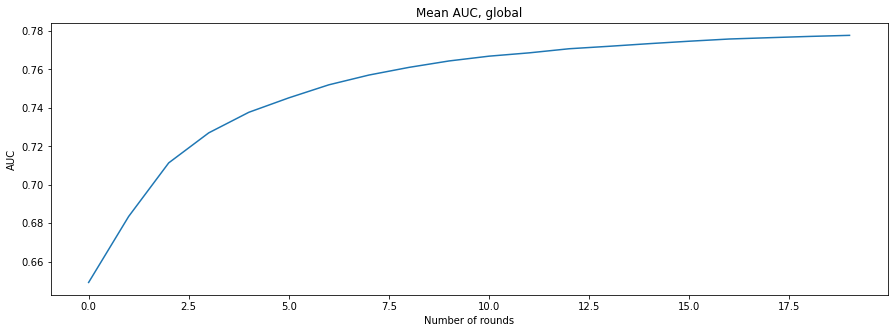

In [19]:
fig = plt.figure(figsize=(15,5))


plt.plot(global_df['round'], global_df['val AUC'])

plt.xlabel('Number of rounds')
plt.ylabel('AUC')
plt.title('Mean AUC, global')

plt.show()

# ResNet50

5 CheXpert clients  
SGD, learning rate 0.01  
One-channel input  

## Binary Classification

## Local Results

In [2]:
path_to_files = 'ignore/resnet_bin/'
local_file='train_results.csv'
local = pd.read_csv(path_to_files + local_file, index_col=0)

In [3]:
local.sort_values(by=['round', 'client', 'epoch'], inplace=True)
local.reset_index(inplace=True, drop=True)
local.head()

,round,client,epoch,time,train loss,val loss,val AUC
0,0,0,1,156.783984,0.244998,0.214080,0.868484
1,0,1,1,153.182867,0.246621,0.234333,0.843570
2,0,2,1,157.572958,0.245503,0.254806,0.851501
3,0,3,1,155.612437,0.246616,0.228765,0.857825
4,0,4,1,152.472409,0.250672,0.255938,0.832440


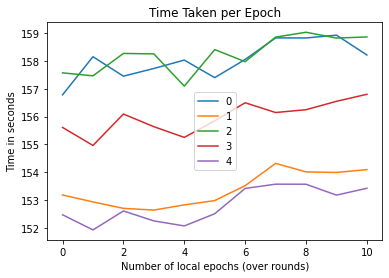

In [4]:
fig = plt.figure()

for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['time'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('Time in seconds')
plt.title('Time Taken per Epoch')

plt.show()

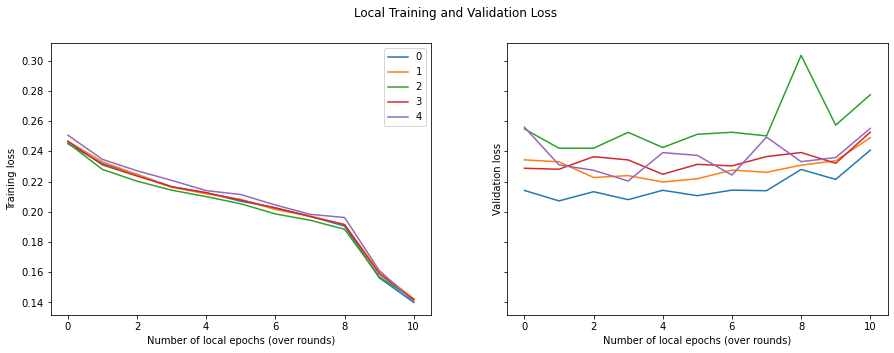

In [5]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))

for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[0].plot(client_df.index, client_df['train loss'], label=client_df['client'][0])

ax[0].legend()
ax[0].set_xlabel('Number of local epochs (over rounds)')
ax[0].set_ylabel('Training loss')


for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[1].plot(client_df.index, client_df['val loss'], label=client_df['client'][0])

ax[1].set_xlabel('Number of local epochs (over rounds)')
ax[1].set_ylabel('Validation loss')

fig.suptitle('Local Training and Validation Loss')


plt.show()

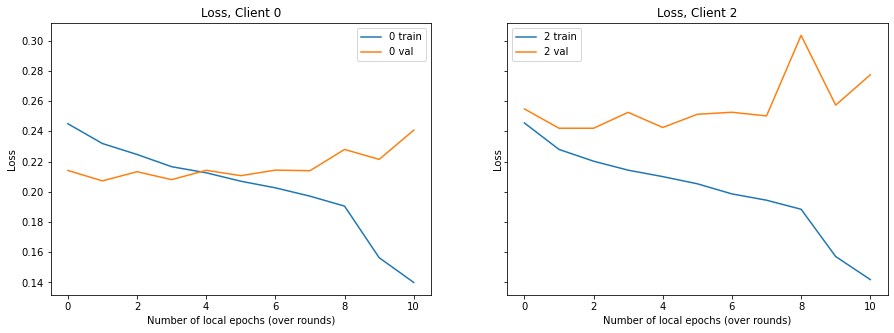

In [6]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))

for i in [0]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[0].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[0].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')


ax[0].legend()
ax[0].set_xlabel('Number of local epochs (over rounds)')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss, Client 0')

for i in [2]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[1].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[1].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')

ax[1].legend()
ax[1].set_xlabel('Number of local epochs (over rounds)')
ax[1].set_ylabel('Loss')
ax[1].set_title('Loss, Client 2')


plt.show()

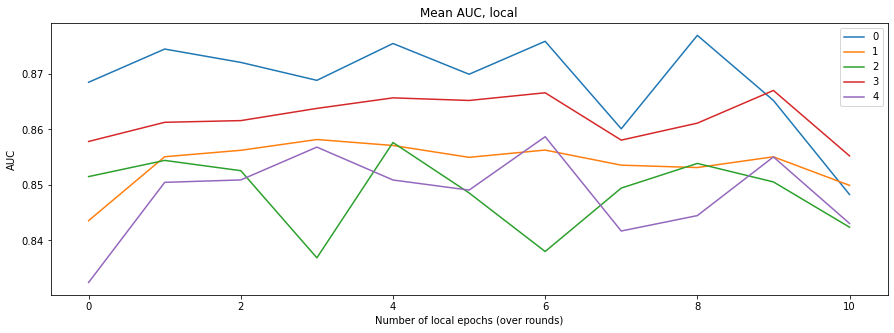

In [7]:
fig = plt.figure(figsize=(15,5))

for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['val AUC'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('AUC')
plt.title('Mean AUC, local')

plt.show()

## Global Results

In [8]:
global_df = pd.read_csv(path_to_files+'global_validation.csv', index_col=None)

In [9]:
global_df

,round,val AUC
0,0,0.853532
1,1,0.864669
2,2,0.866793
3,3,0.869238
4,4,0.871053
5,5,0.871310
6,6,0.871173
7,7,0.869157
8,8,0.871164
9,9,0.861968


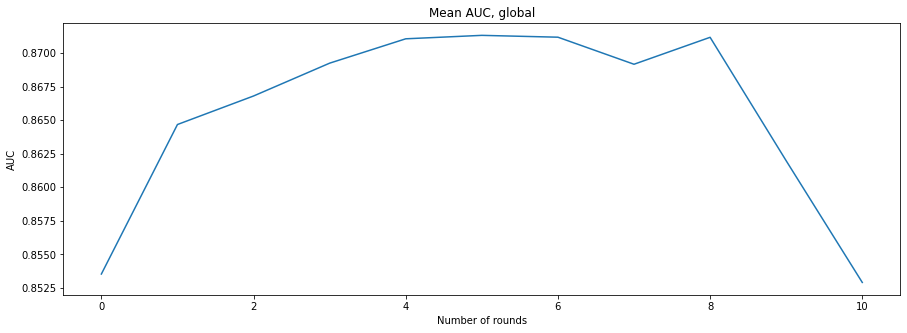

In [10]:
fig = plt.figure(figsize=(15,5))


plt.plot(global_df['round'], global_df['val AUC'])

plt.xlabel('Number of rounds')
plt.ylabel('AUC')
plt.title('Mean AUC, global')

plt.show()

# Baseline Competition Findings

Learning rate 0.01

## Local Results

In [11]:
path_to_files = 'ignore/resnet_comp/'
local_file='train_results.csv'
local = pd.read_csv(path_to_files + local_file, index_col=0)

In [12]:
local.sort_values(by=['round', 'client', 'epoch'], inplace=True)
local.reset_index(inplace=True, drop=True)
local.head()

,round,client,epoch,time,train loss,val loss,val AUC
0,0,0,1,158.012666,0.408689,0.386466,0.755791
1,0,1,1,153.513014,0.410184,0.383014,0.752899
2,0,2,1,158.412439,0.415911,0.371658,0.762809
3,0,3,1,156.648882,0.412032,0.377673,0.758683
4,0,4,1,153.439406,0.408519,0.373357,0.763967


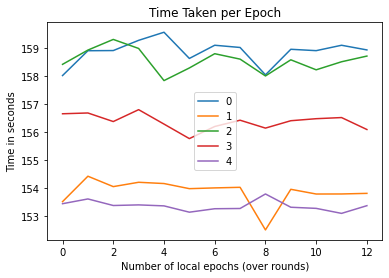

In [13]:
fig = plt.figure()

for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['time'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('Time in seconds')
plt.title('Time Taken per Epoch')

plt.show()

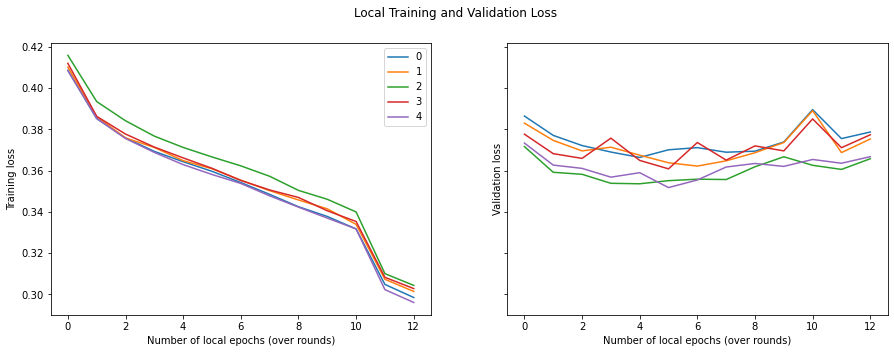

In [14]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))

for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[0].plot(client_df.index, client_df['train loss'], label=client_df['client'][0])

ax[0].legend()
ax[0].set_xlabel('Number of local epochs (over rounds)')
ax[0].set_ylabel('Training loss')


for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[1].plot(client_df.index, client_df['val loss'], label=client_df['client'][0])

ax[1].set_xlabel('Number of local epochs (over rounds)')
ax[1].set_ylabel('Validation loss')

fig.suptitle('Local Training and Validation Loss')


plt.show()

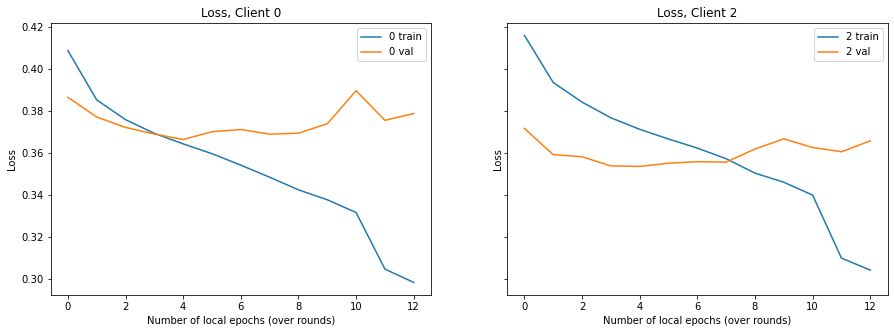

In [15]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))

for i in [0]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[0].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[0].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')


ax[0].legend()
ax[0].set_xlabel('Number of local epochs (over rounds)')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss, Client 0')

for i in [2]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[1].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[1].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')

ax[1].legend()
ax[1].set_xlabel('Number of local epochs (over rounds)')
ax[1].set_ylabel('Loss')
ax[1].set_title('Loss, Client 2')


plt.show()

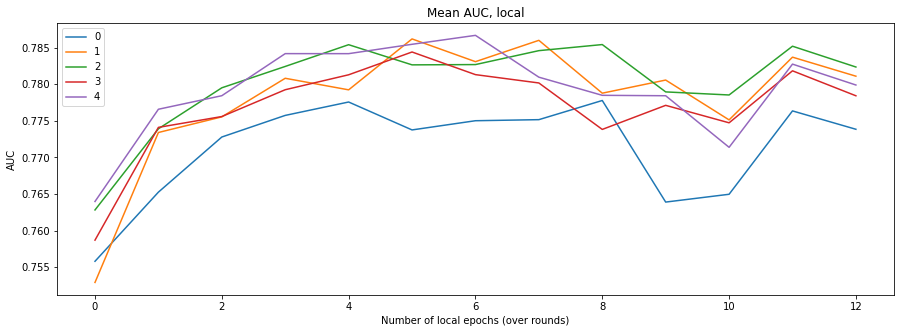

In [16]:
fig = plt.figure(figsize=(15,5))

for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['val AUC'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('AUC')
plt.title('Mean AUC, local')

plt.show()

## Global Results

In [17]:
global_df = pd.read_csv(path_to_files+'global_validation.csv', index_col=None)

In [20]:
global_df 

,round,val AUC
0,0,0.749364
1,1,0.774982
2,2,0.781732
3,3,0.787520
4,4,0.789472
5,5,0.790623
6,6,0.791387
7,7,0.791728
8,8,0.791195
9,9,0.789927


In [23]:
global_df[['val AUC']].idxmax()

val AUC    7
dtype: int64

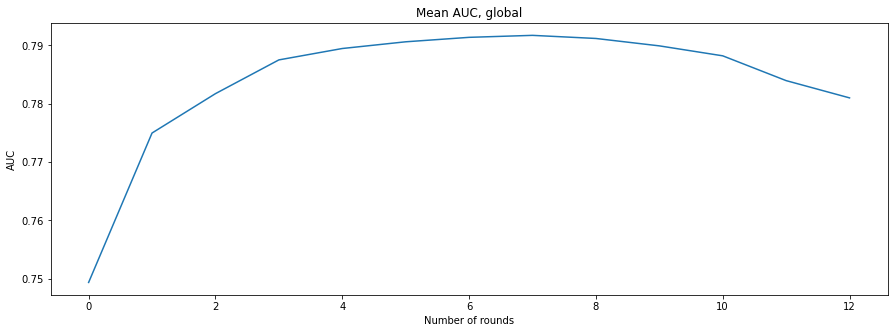

In [19]:
fig = plt.figure(figsize=(15,5))


plt.plot(global_df['round'], global_df['val AUC'])

plt.xlabel('Number of rounds')
plt.ylabel('AUC')
plt.title('Mean AUC, global')

plt.show()

Global model ResNet lr 0.01, round 7, individual results  

client 0  
AUROC mean: 0.7870  
Cardiomegaly : 0.8727  
Edema : 0.8125  
Consolidation : 0.7274  
Atelectasis : 0.6632  
Pleural Effusion : 0.8593  

client 1  
AUROC mean: 0.7910  
Cardiomegaly : 0.8649  
Edema : 0.8322  
Consolidation : 0.6969  
Atelectasis : 0.6887  
Pleural Effusion : 0.8725  

client 2   
AUROC mean: 0.7938  
Cardiomegaly : 0.8728  
Edema : 0.8306  
Consolidation : 0.7144  
Atelectasis : 0.6732  
Pleural Effusion : 0.8781  

client 3  
AUROC mean: 0.7922  
Cardiomegaly : 0.8741  
Edema : 0.8160  
Consolidation : 0.7204  
Atelectasis : 0.6897  
Pleural Effusion : 0.8609  

client 4  
AUROC mean: 0.7945  
Cardiomegaly : 0.8665  
Edema : 0.8312  
Consolidation : 0.7303  
Atelectasis : 0.6700  
Pleural Effusion : 0.8746 

AUC Mean of all clients: 0.792  
Mean for label 2: 0.8701  
Mean for label 5: 0.8244  
Mean for label 6: 0.7179  
Mean for label 8: 0.6769   
Mean for label 10: 0.8690   